In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [41]:
raw_data = pd.read_csv('project_spark_final_data.csv')
raw_data.shape

(701292, 35)

In [42]:
raw_data.columns=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [43]:
raw_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,55,Yes,Travel_Frequently,1041,Sales,11,1,Marketing,1,828818,...,4,80,4,11,4,1,19,19,18,2
1,21,Yes,Travel_Frequently,1147,Hardware,49,1,Human Resources,1,407506,...,1,80,1,12,1,1,10,7,10,2
2,27,Yes,Travel_Frequently,670,Sales,20,3,Other,1,503493,...,1,80,3,33,4,1,9,7,7,3
3,40,No,Travel_Rarely,1052,Hardware,48,1,Technical Degree,1,453899,...,3,80,3,19,6,4,1,1,1,2
4,21,No,Travel_Rarely,1071,Life Sciences,33,5,Marketing,1,312585,...,1,80,1,16,4,1,2,1,2,1


## Data Preprocessing

In [48]:
#print all column name as a list
print(raw_data.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [49]:
# Checking for null values
raw_data.dropna(axis=0,inplace=True)

In [50]:
raw_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
# Return DataFrame with duplicate rows removed
data = raw_data.drop_duplicates()

In [52]:
# printing basic statistical infos per feature of the dataset
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,701292.0000,701292.000000,701292.000000,701292.000000,701292.0,7.012920e+05,701292.000000,701292.000000,701292.000000,701292.000000,...,701292.000000,701292.0,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000
mean,39.4623,797.796754,26.085817,2.943698,1.0,4.943117e+05,2.291147,114.893651,1.837665,2.941592,...,2.188722,80.0,2.427964,17.816330,3.451644,1.750442,10.573286,5.854791,5.821166,6.594608
std,12.1379,476.530372,14.028888,1.450506,0.0,2.984215e+05,1.129057,53.812829,1.043701,1.452345,...,1.105878,0.0,1.149389,11.422511,1.746825,1.047646,8.735921,5.942622,5.969400,7.095264
min,18.0000,11.000000,1.000000,1.000000,1.0,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.0000,445.000000,14.000000,2.000000,1.0,2.301455e+05,1.000000,72.000000,1.000000,2.000000,...,1.000000,80.0,1.000000,7.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,39.0000,798.000000,28.000000,3.000000,1.0,4.965345e+05,2.000000,114.000000,1.000000,3.000000,...,2.000000,80.0,2.000000,18.000000,3.000000,1.000000,8.000000,4.000000,4.000000,4.000000
75%,50.0000,1142.000000,38.000000,4.000000,1.0,7.484162e+05,3.000000,158.000000,3.000000,4.000000,...,3.000000,80.0,4.000000,27.000000,5.000000,2.000000,16.000000,8.000000,8.000000,8.000000
max,60.0000,13459.000000,50.000000,5.000000,1.0,9.913457e+06,4.000000,1345.000000,4.000000,5.000000,...,4.000000,80.0,4.000000,40.000000,6.000000,4.000000,40.000000,40.000000,40.000000,50.000000


## Investigate the categorical plots

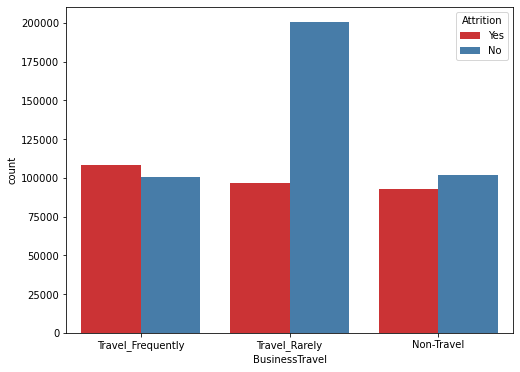

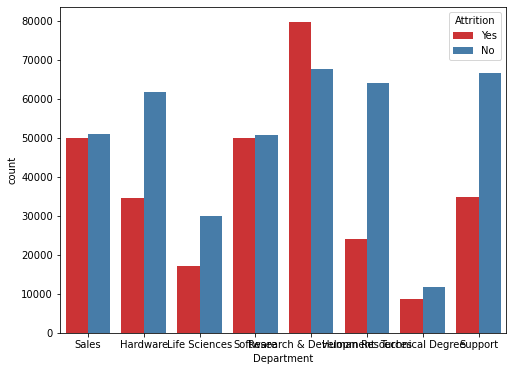

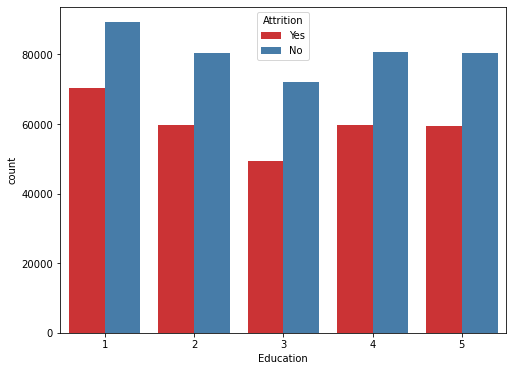

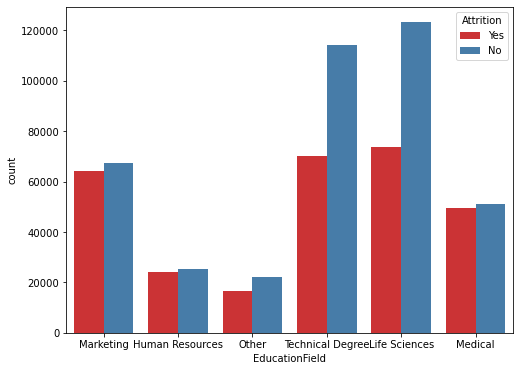

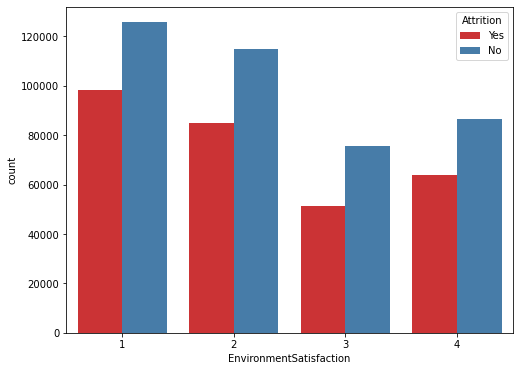

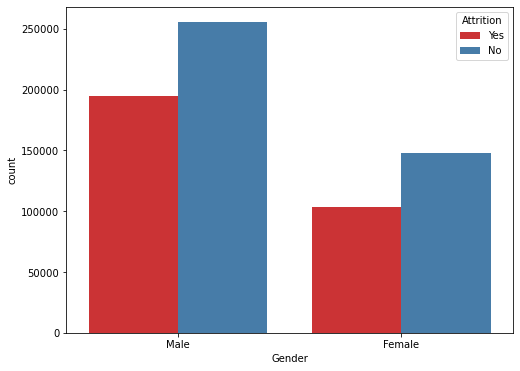

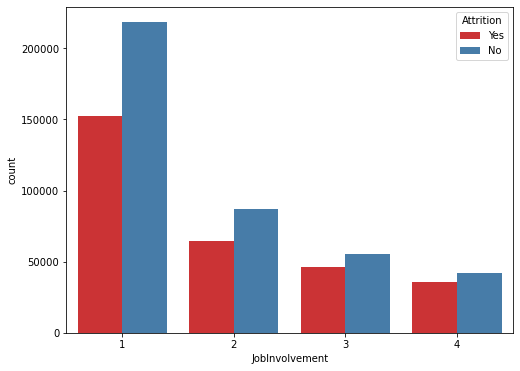

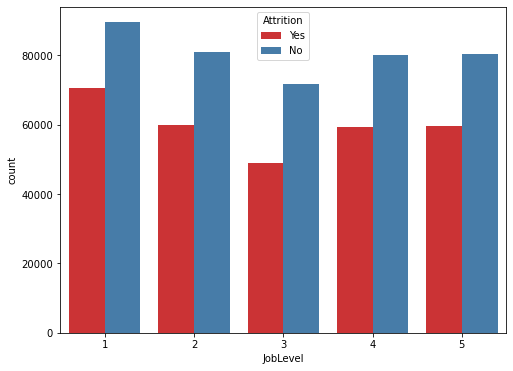

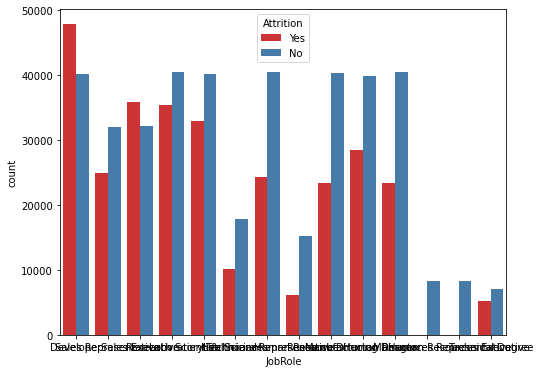

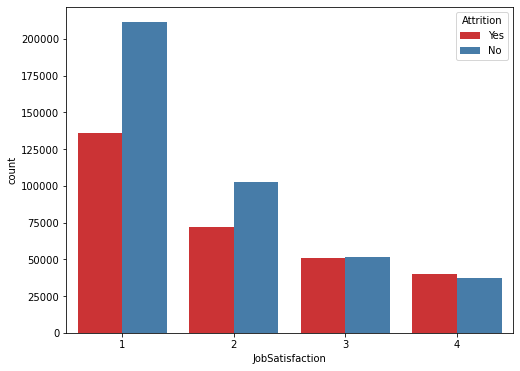

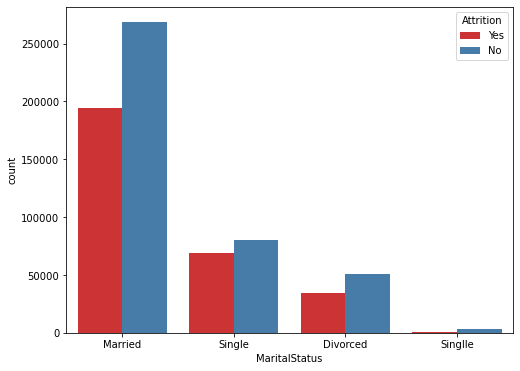

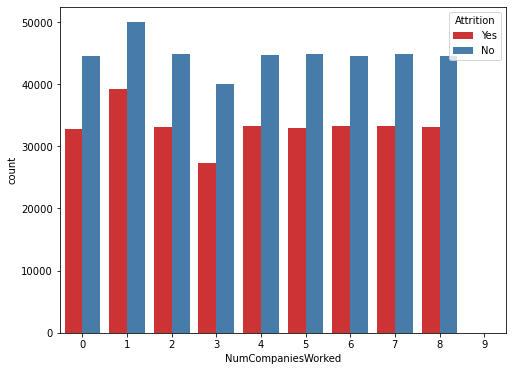

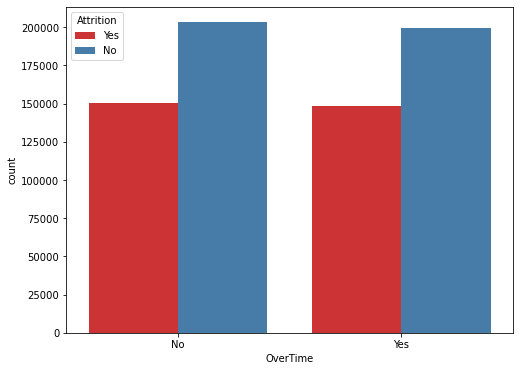

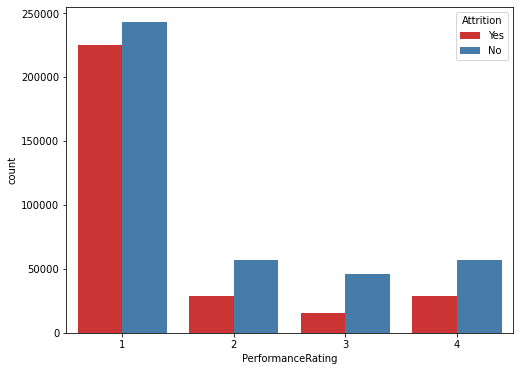

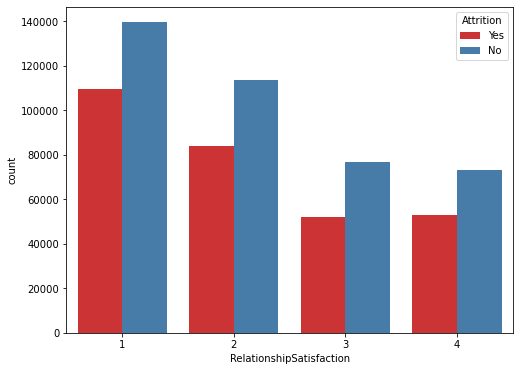

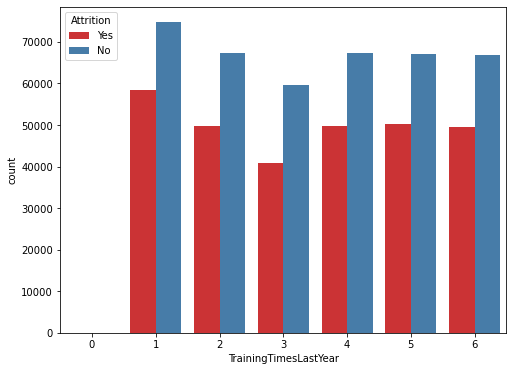

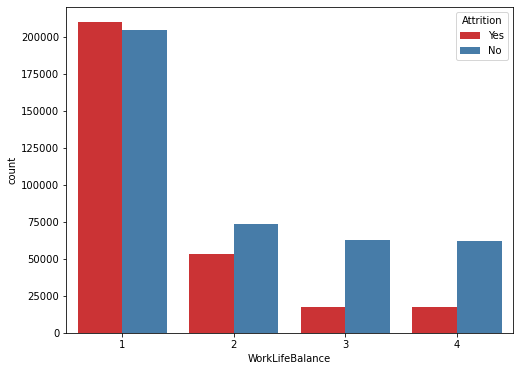

In [53]:
categorcial_features = ['BusinessTravel', 'Department','Education', 'EducationField',
                       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
                        'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 
                        'RelationshipSatisfaction','TrainingTimesLastYear', 'WorkLifeBalance']

for category in categorcial_features:
    plt.figure(figsize = (8, 6))
    sns.countplot(x = category, data = data, hue = 'Attrition', palette = 'Set1')

### Making numeric representation of categorical variables

In [54]:
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column]);   

In [24]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,39,1,1,717,0,10,0,5,0,0,...,30,0,1,18,3,3,14,6,6,4
1,8,1,1,972,0,19,0,5,0,1,...,11,0,0,1,4,0,1,1,1,2
2,26,0,2,936,0,6,0,5,0,0,...,7,0,3,11,1,0,6,2,1,2
3,42,0,1,342,0,19,4,1,2,1,...,37,0,1,16,2,0,1,1,1,2
4,30,1,0,414,0,11,4,1,1,1,...,10,0,0,25,3,0,21,18,6,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701287,24,1,2,758,6,36,4,5,0,0,...,11,0,1,8,6,0,6,2,6,5
701288,40,0,1,485,6,46,4,3,3,0,...,13,0,0,30,3,0,20,17,11,4
701289,36,1,2,102,6,49,4,3,0,1,...,11,1,0,40,5,1,26,10,9,22
701290,19,1,1,1020,6,42,0,5,3,0,...,15,0,0,2,5,0,2,1,1,1


In [55]:
# Investigate all the elements within each Feature 
for column in data.columns:
    unique_vals = data[column].unique()
    length = len(unique_vals)
    if length < 18:
        print("The number of values for feature {}: {} ---> {}".format(column, length, unique_vals))
    else:
        print("The number of values for feature {}: {}".format(column, length))

The number of values for feature Age: 43
The number of values for feature Attrition: 2 ---> [1 0]
The number of values for feature BusinessTravel: 3 ---> [1 2 0]
The number of values for feature DailyRate: 1500
The number of values for feature Department: 8 ---> [4 0 2 5 3 1 7 6]
The number of values for feature DistanceFromHome: 50
The number of values for feature Education: 5 ---> [0 2 4 3 1]
The number of values for feature EducationField: 6 ---> [2 0 4 5 1 3]
The number of values for feature EmployeeCount: 1 ---> [0]
The number of values for feature EmployeeNumber: 467966
The number of values for feature EnvironmentSatisfaction: 4 ---> [0 1 3 2]
The number of values for feature Gender: 2 ---> [1 0]
The number of values for feature HourlyRate: 192
The number of values for feature JobInvolvement: 4 ---> [1 0 3 2]
The number of values for feature JobLevel: 5 ---> [3 0 4 1 2]
The number of values for feature JobRole: 14 ---> [ 0 12 11 10  5  6  1  2  9  8  7  4  3 13]
The number of val

In [56]:
data.shape

(701292, 35)

# Dropping unimportant columns

In [57]:

data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'],inplace=True,axis=1)

In [58]:
data.shape

(701292, 30)

In [59]:
data=data.drop_duplicates()

In [60]:
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,1,1029,4,10,0,2,0,1,...,42,0,3,11,4,0,19,19,18,2
1,3,1,1,1135,0,48,0,0,1,0,...,19,0,0,12,1,0,10,7,10,2
2,9,1,1,658,4,19,2,4,1,0,...,47,0,0,33,4,0,9,7,7,3
3,22,0,2,1040,0,47,0,5,3,0,...,47,0,2,19,6,3,1,1,1,2
4,3,0,2,1059,2,32,4,2,1,1,...,18,0,0,16,4,0,2,1,2,1


## Dropping Constant Features using Variance Threshold Technique

The variance threshold is a simple baseline approach to feature selection. 
It removes all features which variance doesn’t meet some threshold. By default,
it removes all zero-variance features, i.e., features that have the same value 
in all samples. We assume that features with a higher variance may contain more 
useful information, but note that we are not taking the relationship between feature variables or feature 
and target variables into account, which is one of the drawbacks of filter methods.

In [61]:
var_thresh = VarianceThreshold()  # by default the threshold = 0
var_thresh.fit(data)

VarianceThreshold()

In [62]:
var_thresh.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [63]:
print("All features: ", data.columns)

print("Features Selected: ", data.columns[var_thresh.get_support()])

All features:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Features Selected:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime'

The get_support returns a Boolean vector where True means that the variable does not have zero variance.

In [64]:
# the following code drops the columns based on the variance threshold algorithm
selected_columns = data.columns[var_thresh.get_support()]
for cols in data.columns:
    if cols not in selected_columns:
        data.drop(columns = cols, inplace = True)

In [65]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,1,1029,4,10,0,2,0,1,...,42,0,3,11,4,0,19,19,18,2
1,3,1,1,1135,0,48,0,0,1,0,...,19,0,0,12,1,0,10,7,10,2
2,9,1,1,658,4,19,2,4,1,0,...,47,0,0,33,4,0,9,7,7,3
3,22,0,2,1040,0,47,0,5,3,0,...,47,0,2,19,6,3,1,1,1,2
4,3,0,2,1059,2,32,4,2,1,1,...,18,0,0,16,4,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701287,37,0,2,641,1,0,1,2,0,1,...,15,1,0,9,4,3,6,1,6,5
701288,4,1,2,1389,5,21,3,0,1,0,...,16,0,0,14,2,1,9,6,9,5
701289,30,1,2,280,2,38,2,2,1,1,...,41,0,0,33,3,0,9,6,8,1
701290,35,0,2,1428,1,23,1,1,3,0,...,8,2,3,19,2,2,3,1,2,2


In [66]:
data['Attrition'].value_counts()

0    402914
1    298374
Name: Attrition, dtype: int64

## Separate independant (X) and dependant (y) features

In [67]:
X = data.drop(columns = 'Attrition') # Input features (attributes)
y = data['Attrition'] # Target Vector

In [122]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,39,1,717,0,10,0,5,0,0,54,...,30,0,1,18,3,3,14,6,6,4
1,8,1,972,0,19,0,5,0,1,112,...,11,0,0,1,4,0,1,1,1,2
2,26,2,936,0,6,0,5,0,0,92,...,7,0,3,11,1,0,6,2,1,2
3,42,1,342,0,19,4,1,2,1,141,...,37,0,1,16,2,0,1,1,1,2
4,30,0,414,0,11,4,1,1,1,31,...,10,0,0,25,3,0,21,18,6,19


In [68]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Attrition, dtype: int32

## Train Test Split for finding correlation between features

In [69]:
# Let's first drop the feature EmployeeNumber as it is a personal identifier
# Let's split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)


In [180]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Feature Selection using Pearson's correlation

In [70]:
corr = X_train.corr()
corr

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.167036,0.005657,-0.085236,-0.050834,0.003613,-0.005152,0.019640,0.008841,0.005370,...,0.012881,0.160995,0.024003,0.139813,0.005854,0.152679,0.001719,-0.003888,0.000202,0.038155
BusinessTravel,0.167036,1.000000,0.001637,-0.099682,-0.003170,0.004955,-0.029842,0.031655,0.002664,0.002714,...,0.006898,0.131667,0.050829,0.045736,0.008433,0.119424,0.001470,0.000261,0.000707,0.027116
DailyRate,0.005657,0.001637,1.000000,-0.002197,0.000109,0.001853,0.000201,-0.000778,-0.002552,-0.000820,...,0.005228,0.002310,0.001000,0.012300,0.002067,0.005428,0.003059,0.000970,-0.000145,0.001259
Department,-0.085236,-0.099682,-0.002197,1.000000,-0.003216,0.003004,0.047669,-0.004066,-0.000427,-0.001738,...,0.003151,-0.011800,-0.003551,0.002882,0.003147,-0.001190,0.000501,-0.000600,0.000836,-0.023060
DistanceFromHome,-0.050834,-0.003170,0.000109,-0.003216,1.000000,0.012985,-0.023961,0.027927,-0.006048,0.002212,...,0.012177,-0.067625,0.030433,-0.090905,0.010479,-0.023509,0.008552,0.006971,0.006206,-0.015552
Education,0.003613,0.004955,0.001853,0.003004,0.012985,1.000000,-0.001453,0.009454,0.000331,0.000945,...,0.008799,-0.013585,0.007784,0.006371,0.006136,0.017564,0.004422,0.002702,0.003449,-0.004860
EducationField,-0.005152,-0.029842,0.000201,0.047669,-0.023961,-0.001453,1.000000,0.030749,0.003192,-0.001434,...,0.000214,0.058898,0.030494,0.045862,-0.000216,0.083820,0.000107,-0.002400,-0.000488,0.000499
EnvironmentSatisfaction,0.019640,0.031655,-0.000778,-0.004066,0.027927,0.009454,0.030749,1.000000,-0.001900,0.001503,...,0.008408,0.014885,0.087597,-0.013156,0.005545,0.120928,0.004326,0.003029,0.001846,0.003672
Gender,0.008841,0.002664,-0.002552,-0.000427,-0.006048,0.000331,0.003192,-0.001900,1.000000,0.000598,...,0.000646,0.006469,-0.001116,0.015611,-0.000727,0.005007,0.000429,-0.001077,0.001817,0.003111
HourlyRate,0.005370,0.002714,-0.000820,-0.001738,0.002212,0.000945,-0.001434,0.001503,0.000598,1.000000,...,0.003862,-0.005625,-0.000991,0.006556,0.003214,0.002738,0.003269,0.002549,0.002587,0.002750


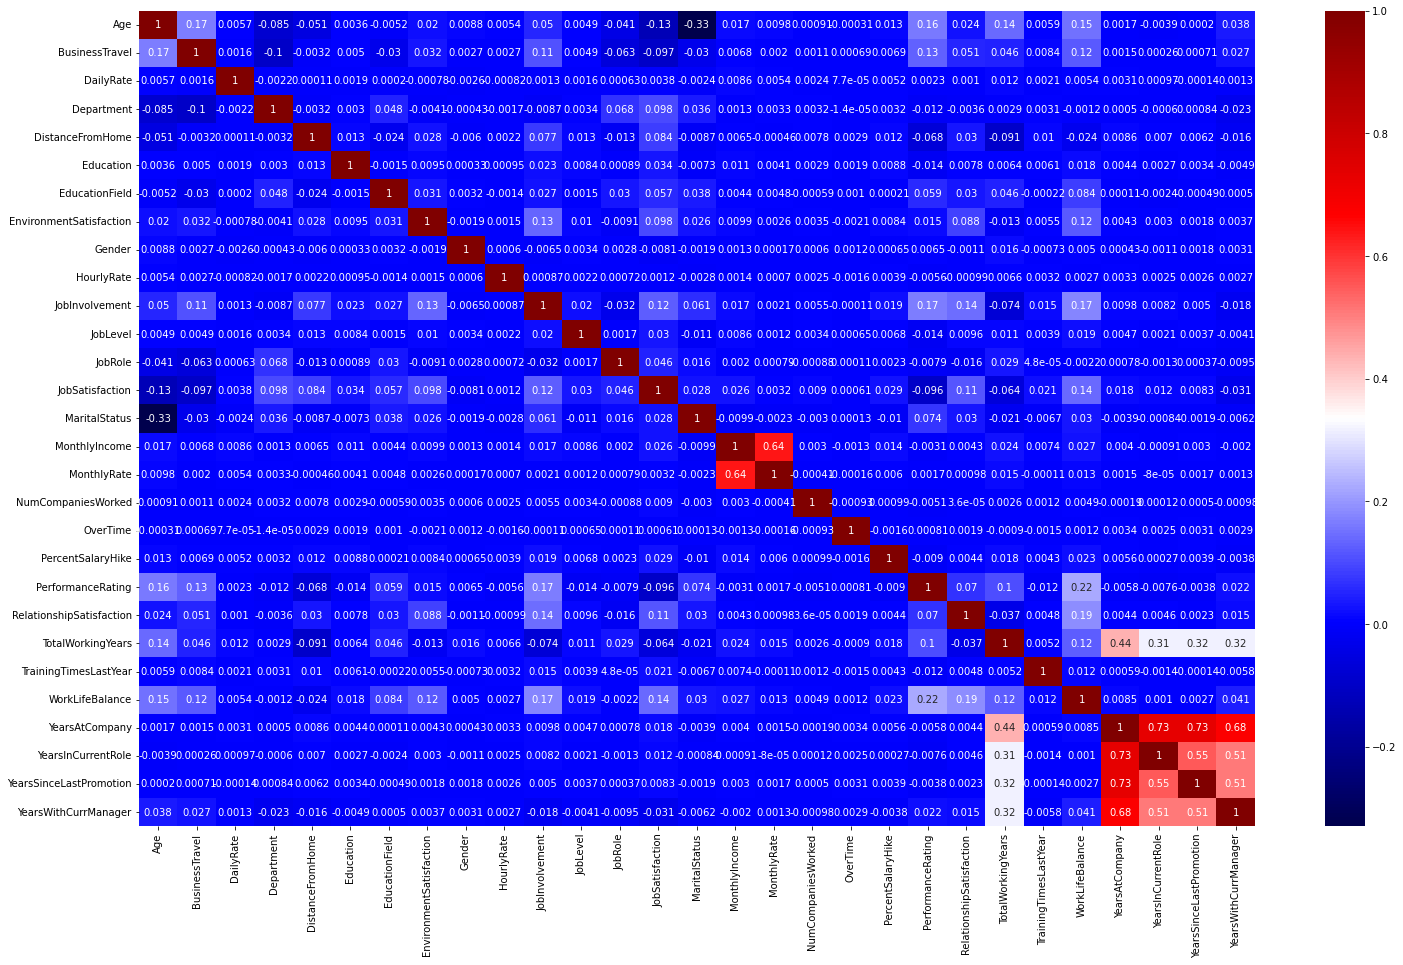

In [71]:
# visualizing correlation using a heatmap
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, cmap = "seismic");

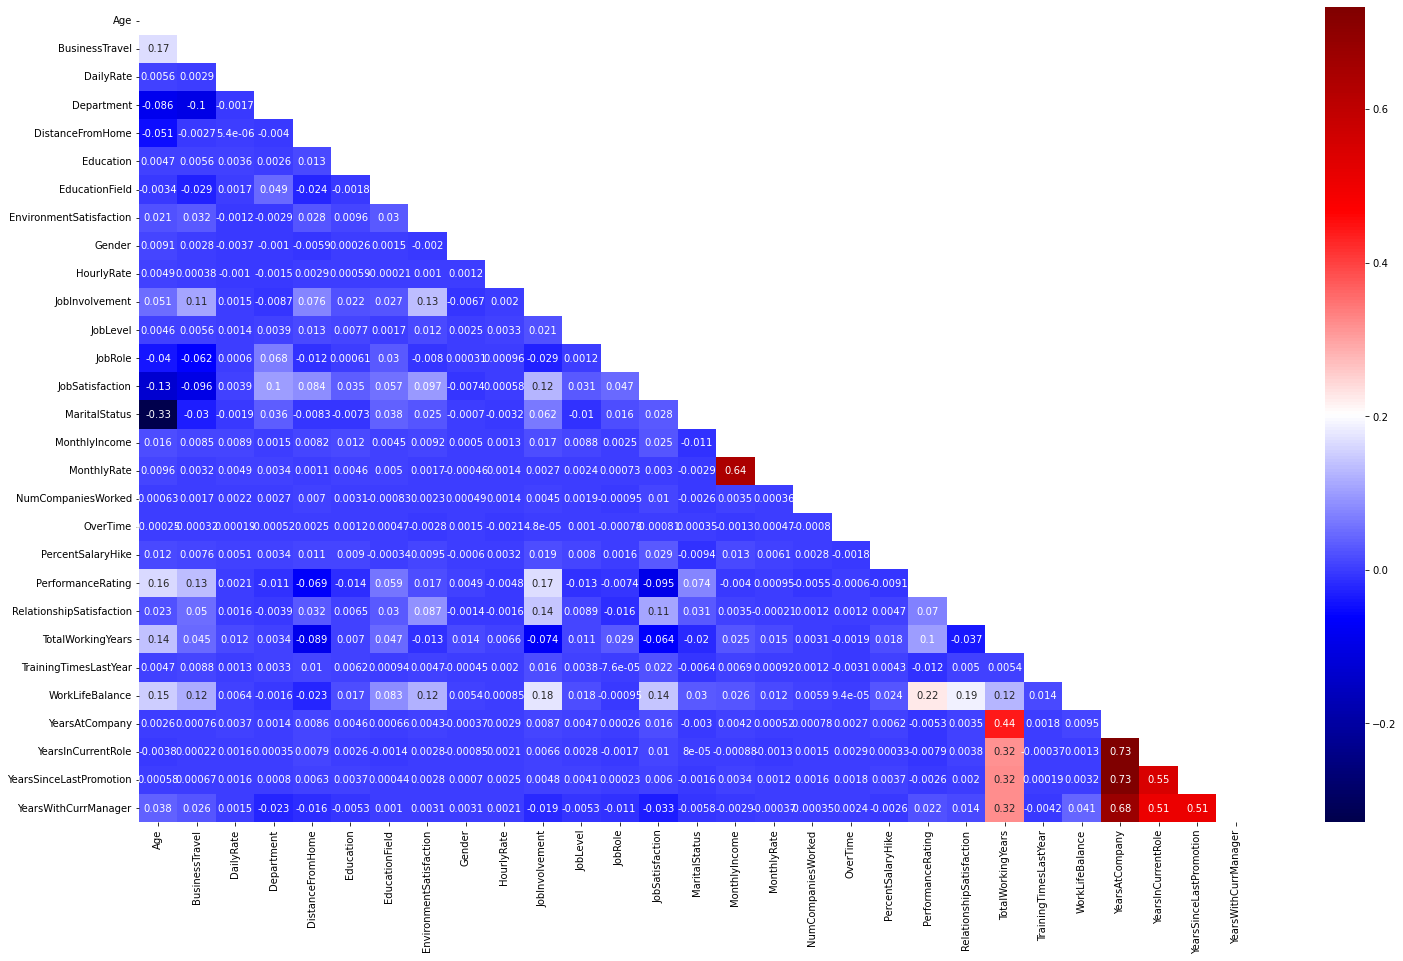

In [182]:
# use of the mask 
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [72]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [73]:
corr_features = correlation(X_train, 0.75) # 75% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [81]:
# So let's drop the feature MonthlyIncome 
#data.drop(columns = 'JobLevel',inplace=True)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
chi2_features = SelectKBest(chi2, k = 6) 
X_kbest_features = chi2_features.fit_transform(X, y)
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,X.columns):
    if bool:
        new_feature.append(feature)
list3=new_feature
list3

In [185]:
print(data.shape)
data.head()

(701288, 30)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,39,1,1,717,0,10,0,5,0,0,...,30,0,1,18,3,3,14,6,6,4
1,8,1,1,972,0,19,0,5,0,1,...,11,0,0,1,4,0,1,1,1,2
2,26,0,2,936,0,6,0,5,0,0,...,7,0,3,11,1,0,6,2,1,2
3,42,0,1,342,0,19,4,1,2,1,...,37,0,1,16,2,0,1,1,1,2
4,30,1,0,414,0,11,4,1,1,1,...,10,0,0,25,3,0,21,18,6,19


## Convert categorical features to separate columns

In [76]:
for column in data.columns:
    unique_vals = data[column].unique()
    length = len(unique_vals)
    if length < 18:
        print("The number of values for feature {}: {} ---> {}".format(column, length, unique_vals))
    else:
        print("The number of values for feature {}: {}".format(column, length))

The number of values for feature Age: 43
The number of values for feature Attrition: 2 ---> [1 0]
The number of values for feature BusinessTravel: 3 ---> [1 2 0]
The number of values for feature DailyRate: 1500
The number of values for feature Department: 8 ---> [4 0 2 5 3 1 7 6]
The number of values for feature DistanceFromHome: 50
The number of values for feature Education: 5 ---> [0 2 4 3 1]
The number of values for feature EducationField: 6 ---> [2 0 4 5 1 3]
The number of values for feature EnvironmentSatisfaction: 4 ---> [0 1 3 2]
The number of values for feature Gender: 2 ---> [1 0]
The number of values for feature HourlyRate: 192
The number of values for feature JobInvolvement: 4 ---> [1 0 3 2]
The number of values for feature JobLevel: 5 ---> [3 0 4 1 2]
The number of values for feature JobRole: 14 ---> [ 0 12 11 10  5  6  1  2  9  8  7  4  3 13]
The number of values for feature JobSatisfaction: 4 ---> [0 1 3 2]
The number of values for feature MaritalStatus: 4 ---> [1 2 0 3]


In [77]:
new_raw_data = pd.get_dummies(data, columns = ['BusinessTravel', 'Department',
       'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance'])
print(new_raw_data.shape)

(701288, 99)


In [78]:
list(new_raw_data.columns)

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_0',
 'BusinessTravel_1',
 'BusinessTravel_2',
 'Department_0',
 'Department_1',
 'Department_2',
 'Department_3',
 'Department_4',
 'Department_5',
 'Department_6',
 'Department_7',
 'Education_0',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'EducationField_0',
 'EducationField_1',
 'EducationField_2',
 'EducationField_3',
 'EducationField_4',
 'EducationField_5',
 'EnvironmentSatisfaction_0',
 'EnvironmentSatisfaction_1',
 'EnvironmentSatisfaction_2',
 'EnvironmentSatisfaction_3',
 'Gender_0',
 'Gender_1',
 'JobInvolvement_0',
 'JobInvolvement_1',
 'JobInvolvement_2',
 'JobInvolvement_3',
 'JobRole_0',
 'JobRole_1',
 'JobRole_2',
 'JobRole_3',
 'JobRole_4',
 'JobRole_5',
 'JobRole_6',
 'JobRole

## Train test split for classification

In [79]:
X = new_raw_data.drop(columns = 'Attrition') # Input features (attributes)
y = new_raw_data['Attrition'] # Target Vector

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [81]:
# We need to scale correctly (We will use MinMax Scaler to do this)
cols_to_scale = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate','PercentSalaryHike',
               'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
 'YearsSinceLastPromotion']
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [82]:
X_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_0,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3
421890,0.333333,0.302201,0.836735,0.178010,3,0.480831,0.401731,0.714286,0.125,0.200,...,0,0,0,0,1,0,1,0,0,0
148332,0.285714,0.319546,0.408163,0.628272,3,0.268146,0.468948,0.673469,0.725,0.725,...,1,0,0,0,0,0,1,0,0,0
285192,1.000000,0.359573,0.040816,0.104712,3,0.426681,0.613672,0.673469,0.200,0.025,...,0,0,0,1,0,0,0,0,1,0
528961,0.809524,0.264843,0.938776,0.628272,4,0.848735,0.155033,0.612245,0.200,0.125,...,0,0,0,0,1,0,0,0,1,0
280641,0.690476,0.920614,0.448980,0.371728,4,0.543641,0.378736,0.816327,0.550,0.400,...,1,0,0,0,0,0,0,0,0,1


In [83]:
X_test.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_0,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3
402496,0.857143,0.370247,0.183673,0.115183,0,0.428509,0.394342,0.693878,0.075,0.075,...,0,1,0,0,0,0,1,0,0,0
208662,0.380952,0.606404,0.530612,0.753927,0,0.724087,0.561125,0.653061,0.825,0.050,...,0,0,0,1,0,0,1,0,0,0
20954,0.333333,0.060040,0.591837,0.989529,1,0.478269,0.694672,0.244898,0.125,0.100,...,0,1,0,0,0,0,1,0,0,0
476208,0.380952,0.555037,0.244898,0.356021,4,0.312502,0.407871,0.734694,0.675,0.300,...,1,0,0,0,0,0,1,0,0,0
436923,0.452381,0.603069,0.163265,0.240838,1,0.264968,0.379260,0.775510,0.975,0.300,...,0,1,0,0,0,0,0,0,0,1


## Classification Algorithms

Decision Tree

In [84]:
# Create a model
dt = DecisionTreeClassifier( criterion='entropy',max_depth = 2, random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [85]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=new_raw_data.drop('Attrition', axis=1).columns,    
    class_names=new_raw_data['Attrition'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)

#graph

In [86]:
data.shape

(701288, 30)

## Feature Importance

In [87]:
for i, column in enumerate(data.drop('Attrition', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data

#final_fi = final_fi.sort_values('Feature Importance Score', ascending = True).reset_index(drop=True)            


Importance of feature Age:, 0.524
Importance of feature BusinessTravel:, 0.000
Importance of feature DailyRate:, 0.352
Importance of feature Department:, 0.000
Importance of feature DistanceFromHome:, 0.000
Importance of feature Education:, 0.000
Importance of feature EducationField:, 0.000
Importance of feature EnvironmentSatisfaction:, 0.000
Importance of feature Gender:, 0.000
Importance of feature HourlyRate:, 0.000
Importance of feature JobInvolvement:, 0.000
Importance of feature JobLevel:, 0.000
Importance of feature JobRole:, 0.000
Importance of feature JobSatisfaction:, 0.000
Importance of feature MaritalStatus:, 0.000
Importance of feature MonthlyIncome:, 0.123
Importance of feature MonthlyRate:, 0.000
Importance of feature NumCompaniesWorked:, 0.000
Importance of feature OverTime:, 0.000
Importance of feature PercentSalaryHike:, 0.000
Importance of feature PerformanceRating:, 0.000
Importance of feature RelationshipSatisfaction:, 0.000
Importance of feature TotalWorkingYears

Depth =  2 , Training Accuracy =  0.7112382582036612 , Test Accuracy =  0.7099701977783799 , Diff =  0.126806042528127  %
Depth =  3 , Training Accuracy =  0.7112382582036612 , Test Accuracy =  0.7099701977783799 , Diff =  0.126806042528127  %
Depth =  4 , Training Accuracy =  0.7268559613567902 , Test Accuracy =  0.7255628912432802 , Diff =  0.12930701135099865  %
Depth =  5 , Training Accuracy =  0.7353492683100725 , Test Accuracy =  0.733362802834776 , Diff =  0.19864654752965727  %
Depth =  6 , Training Accuracy =  0.742013796053687 , Test Accuracy =  0.7410201200644526 , Diff =  0.09936759892343883  %
Depth =  7 , Training Accuracy =  0.7497121366058856 , Test Accuracy =  0.7482995622353092 , Diff =  0.14125743705764027  %
Depth =  8 , Training Accuracy =  0.7531700622070121 , Test Accuracy =  0.749939397396227 , Diff =  0.32306648107851554  %
Depth =  9 , Training Accuracy =  0.7584817211200827 , Test Accuracy =  0.7536682399577921 , Diff =  0.48134811622906337  %
Depth =  10 , T

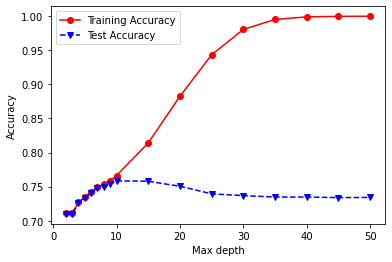

In [88]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

## Result Decision Tree

In [89]:
# Accuracy Report
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77     80583
           1       0.73      0.50      0.59     59675

    accuracy                           0.71    140258
   macro avg       0.72      0.68      0.68    140258
weighted avg       0.71      0.71      0.70    140258

Train Accuracy:  0.7112382582036612
Test Accuracy:  0.7099701977783799


In [90]:
dt1 = DecisionTreeClassifier( criterion='entropy',max_depth = 10, random_state=0)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [91]:
y_pred = dt1.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dt1.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80     80583
           1       0.77      0.60      0.68     59675

    accuracy                           0.76    140258
   macro avg       0.76      0.73      0.74    140258
weighted avg       0.76      0.76      0.75    140258

Train Accuracy:  0.7617952694151828
Test Accuracy:  0.7550727944217086


# RandomForest

In [92]:
from sklearn.ensemble import RandomForestClassifier

model_tree = RandomForestClassifier(n_estimators = 20,max_depth=10)
model_tree.fit(X_train, y_train)
pred = model_tree.predict(X_test)

print("Accuracy Score: ",accuracy_score(pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(pred,y_test))
print("Classification Report: \n",classification_report(pred,y_test))

Accuracy Score:  0.733762067047869
Confusion Matrix:
 [[75393 32152]
 [ 5190 27523]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.70      0.80    107545
           1       0.46      0.84      0.60     32713

    accuracy                           0.73    140258
   macro avg       0.70      0.77      0.70    140258
weighted avg       0.82      0.73      0.75    140258



# xgboost

In [93]:

from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
Model=XGBClassifier() 
Model.fit(X_train, y_train)
pred = Model.predict(X_test)

print("Accuracy Score: ",accuracy_score(pred,y_test))
print("Confusion Matrix:",confusion_matrix(pred,y_test))
print("Classification Report: ",classification_report(pred,y_test))

Accuracy Score:  0.7690470418799641
Confusion Matrix: [[69938 21748]
 [10645 37927]]
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.76      0.81     91686
           1       0.64      0.78      0.70     48572

    accuracy                           0.77    140258
   macro avg       0.75      0.77      0.76    140258
weighted avg       0.79      0.77      0.77    140258



# Logistic regression 

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Accuracy Score: ",accuracy_score(pred,y_test))
print("Confusion Matrix:",confusion_matrix(pred,y_test))
print("Classification Report: ",classification_report(pred,y_test))

Accuracy Score:  0.7005090618716936
Confusion Matrix: [[63510 24933]
 [17073 34742]]
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.72      0.75     88443
           1       0.58      0.67      0.62     51815

    accuracy                           0.70    140258
   macro avg       0.69      0.69      0.69    140258
weighted avg       0.71      0.70      0.70    140258



# GradientBoostingClassifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [96]:
gradient_booster.fit(X_train,y_train)


GradientBoostingClassifier()

In [61]:
y_pred=gradient_booster.predict(X_test)

In [62]:
print("Accuracy Score: ",accuracy_score(y_pred,y_test))
print("Confusion Matrix:",confusion_matrix(y_pred,y_test))

Accuracy Score:  0.7470603086197796
Confusion Matrix: [[64294 22256]
 [10806 33355]]


In [63]:
print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80     75100
           1       0.76      0.60      0.67     55611

    accuracy                           0.75    130711
   macro avg       0.75      0.73      0.73    130711
weighted avg       0.75      0.75      0.74    130711



## Multiple ROC-Curves in a single plot

In [97]:
final_roc_auc = []

In [99]:
probas1 = dt1.predict_proba(X_test)[:, 1]
probas2 = model_tree.predict_proba(X_test)[:, 1]
probas3 = Model.predict_proba(X_test)[:, 1]
probas4 = model.predict_proba(X_test)[:, 1]
probas6 =gradient_booster.predict_proba(X_test)[:, 1]

In [100]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)

In [101]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Random Forest Classifier', roc_auc_score(y_test, probas2))
print('roc_auc_score for XGboost: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for Logistic regression: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Gradient Boosting classifier: ', roc_auc_score(y_test, probas6))

roc_auc_score for DecisionTree:  0.8511774068179024
roc_auc_score for Random Forest Classifier 0.8241630504377189
roc_auc_score for XGboost:  0.8718010030183214
roc_auc_score for Logistic regression:  0.7686352505446263
roc_auc_score for Gradient Boosting classifier:  0.8340788997042037


In [102]:
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': ' XGboost', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'Logistic regression', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Gradient Boosting classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})


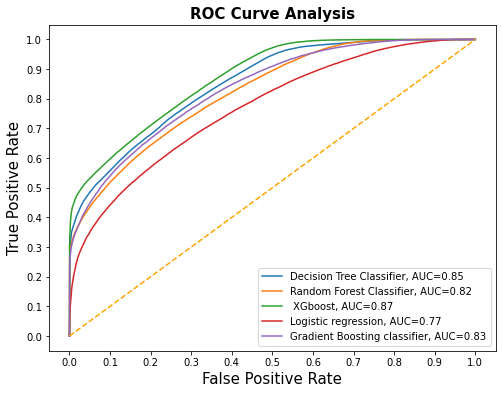

In [103]:

fig = plt.figure(figsize=(8,6))

for m in final_roc_auc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()